# This notebook will introduce how to plot a gif
<br>
<font size=4>
    In this note book, we will use the macro @gif to plot a gif and troduce some details about this code.
    <font>
<br>
<br>
<font color= "red">
    Noticing that, the macro @gif is included in package Plots, so we need to using Plots first
<font>

In [2]:
using Plots

The first example is plot sin(t) as t increases
<br>

here we push the elements to the plot

┌ Info: Saved animation to 
│   fn = /home/richard/文档/Julia_code_notebook/tmp.gif
└ @ Plots /home/richard/.julia/packages/Plots/iYDwd/src/animation.jl:104


Plots.AnimatedGif("/home/richard/文档/Julia_code_notebook/tmp.gif")
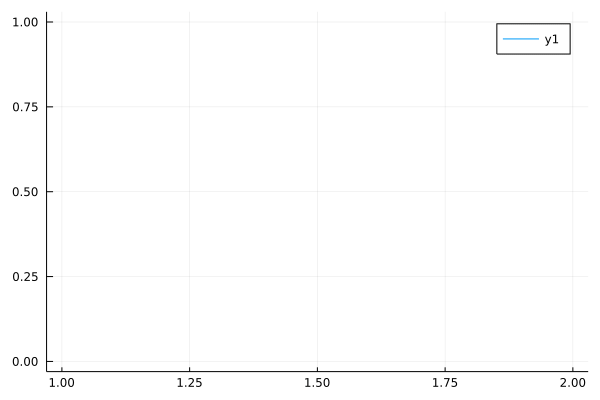

In [3]:
p = plot(1) # initialize a plot with 1 empty series
 @gif for x=0:0.05:4*π
           push!(p, sin(x))
end

The second example is plotting a function depends on the parameter "i"

<br>
Here the macro @userplot and @recipe is used. For more detailed information about these two macro we can refrence
<br>
<br>
[Reference to recipes](http://docs.juliaplots.org/latest/recipes/)
<br>

The step can be summerrized as

* define function
* initial parameters
* @gif for i in 1:steps
* function(i)
* end

In [9]:
@userplot CirclePlot
@recipe function f(cp::CirclePlot)
    x, y, i = cp.args
    n = length(x)
    inds = circshift(1:n, 1 - i)
    linewidth --> range(0, 10, length = n)
    seriesalpha --> range(0, 1, length = n)
    aspect_ratio --> 1
    label --> false
    x[inds], y[inds]
end

┌ Info: Saved animation to 
│   fn = /home/richard/文档/Julia_code_notebook/tmp.gif
└ @ Plots /home/richard/.julia/packages/Plots/iYDwd/src/animation.jl:104


Plots.AnimatedGif("/home/richard/文档/Julia_code_notebook/tmp.gif")
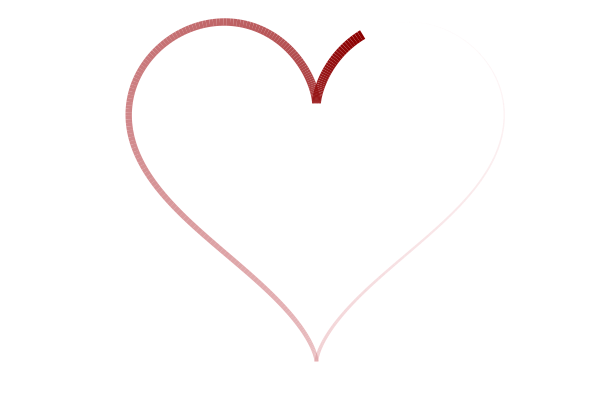

In [8]:
n = 400
t = range(0, 2π, length = n)
x = 16sin.(t).^3
y = 13cos.(t) .- 5cos.(2t) .- 2cos.(3t) .- cos.(4t)

@gif for i ∈ 1:n
    circleplot(x, y, i, line_z = 1:n, cbar = false, c = :reds, framestyle = :none)
end when i > 40 && mod1(i, 10) == 5

## Two usages emphasized here

1. **The first is @gif func end every N**
<br>
This means the gif will be plot every N steps
2. **The second is @gif func end when expression**
<br>
The gif will be plot only when the expression is true

┌ Info: Saved animation to 
│   fn = /home/richard/文档/Julia_code_notebook/tmp.gif
└ @ Plots /home/richard/.julia/packages/Plots/iYDwd/src/animation.jl:104


Plots.AnimatedGif("/home/richard/文档/Julia_code_notebook/tmp.gif")
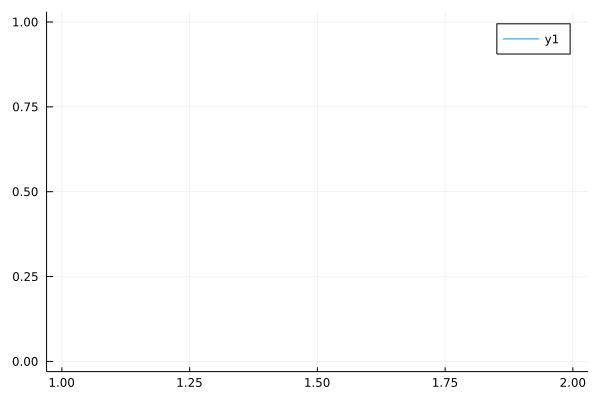

In [10]:
p = plot(1) # initialize a plot with 1 empty series
 @gif for x=0:0.05:4*π
           push!(p, sin(x))
end every 10

┌ Info: Saved animation to 
│   fn = /home/richard/文档/Julia_code_notebook/tmp.gif
└ @ Plots /home/richard/.julia/packages/Plots/iYDwd/src/animation.jl:104


Plots.AnimatedGif("/home/richard/文档/Julia_code_notebook/tmp.gif")
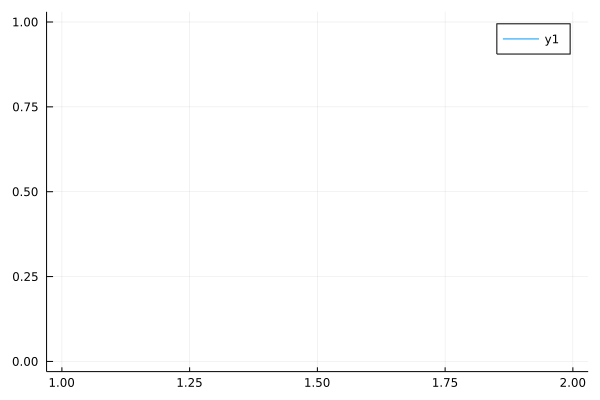

In [13]:
p = plot(1) # initialize a plot with 1 empty series
 @gif for x=0:0.05:4*π
           push!(p, sin(x))
end when x<pi

# Another example is Ploting a gif using macro anim and gif
macro @animate is similiar to macro @gif , and return a result called "anim"
<br>
<br>
gif(anim,filename,fps)<br>  fps: frames per second

┌ Info: Saved animation to 
│   fn = /home/richard/文档/Julia_code_notebook/anim_fps15.gif
└ @ Plots /home/richard/.julia/packages/Plots/iYDwd/src/animation.jl:104


Plots.AnimatedGif("/home/richard/文档/Julia_code_notebook/anim_fps15.gif")
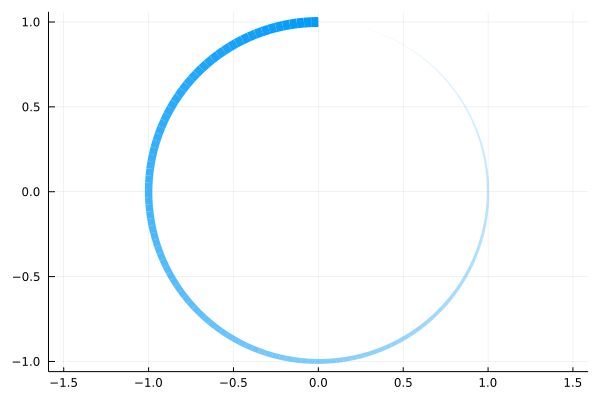

In [15]:
n = 150
t = range(0, 2π, length = n)
x = sin.(t)
y = cos.(t)

anim = @animate for i ∈ 1:n
    circleplot(x, y, i)
end
gif(anim, "anim_fps15.gif", fps = 15)